## Import Essential Libraries

In [67]:
# !pip install pandas
# !pip install numpy
# !pip install seaborn
# !pip install scikit-learn
# !pip install xgboost

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from dateutil import parser

## Import Dataset

In [69]:
Finetech_data = pd.read_csv("FineTech_AppData.csv")


In [70]:
Finetech_data.shape

(50000, 12)

## Data Information
1. **user**: Unique ID for each user.

2. **first_open**: Date (yy-mm-dd) and time (Hour:Minute:Seconds:Milliseconds) of login on app first time.

3. **dayofweek**: On which day user logon.

    Sunday,
Monday,
Tuesday,
Wednesday,
Thursday,
Friday,
Saturday

4. **Hour**: Time of a day in 24-hour format customer logon. It is correlated with dayofweek column.

5. **age**: The age of the registered user.

6. **screen_list**: The name of multiple screens seen by customers, which are separated by a comma.

7. **minigame**: Tha app contains small games related to finance. If the customer played mini-game then 1 otherwise 0.

8. **used_premium_feature**: If the customer used the premium feature of the app then 1 otherwise 0.

9. **enrolled**: If the user bought a premium feature app then 1 otherwise 0.

10. **enrolled_date**: On the date (yy-mm-dd) and time (Hour:Minute:Seconds:Milliseconds) the user bought a premium features app.

11. **liked**: The each screen of the app has a like button if the customer likes it then 1 otherwise 0.

In [71]:
Finetech_data.head(5)

,Unnamed: 0,user,first_open,hour,age,screen_list,minigame,used_premium_feature,enrolled,enrolled_date,liked,dayofweek
0,0,235136,2012-12-27 02:14:51.273,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",0,0,0,NaN,0,Wednesday
1,1,333588,2012-12-02 01:16:00.905,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",0,0,0,NaN,0,Saturday
2,2,254414,2013-03-19 19:19:09.157,19:00:00,23,"Splash,Cycle,Loan",0,1,0,NaN,1,Monday
3,3,234192,2013-07-05 16:08:46.354,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",0,0,1,2013-07-05 16:11:49.513,0,Thursday
4,4,51549,2013-02-26 18:50:48.661,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",0,0,1,2013-02-26 18:56:37.841,1,Monday


In [72]:
Finetech_data.tail(5)

,Unnamed: 0,user,first_open,hour,age,screen_list,minigame,used_premium_feature,enrolled,enrolled_date,liked,dayofweek
49995,49995,222774,2013-05-09 13:46:17.871,13:00:00,32,"Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...",0,0,1,2013-05-09 13:47:52.875,0,Wednesday
49996,49996,169179,2013-04-09 00:05:17.823,00:00:00,35,"Cycle,Splash,Home,RewardsContainer",0,1,0,NaN,0,Monday
49997,49997,302367,2013-02-20 22:41:51.165,22:00:00,39,"joinscreen,product_review,product_review2,Scan...",0,0,0,NaN,0,Tuesday
49998,49998,324905,2013-04-28 12:33:04.288,12:00:00,27,"Cycle,Home,product_review,product_review,produ...",0,0,1,2013-04-28 12:35:38.709,0,Saturday
49999,49999,27047,2012-12-14 01:22:44.638,01:00:00,25,"product_review,ScanPreview,VerifyDateOfBirth,V...",0,0,0,NaN,1,Thursday


In [73]:
Finetech_data.isnull().sum()

Unnamed: 0                  0
user                        0
first_open                  0
hour                        0
age                         0
screen_list                 0
minigame                    0
used_premium_feature        0
enrolled                    0
enrolled_date           18926
liked                       0
dayofweek                   0
dtype: int64

All columns contain 0 null value except enrolled_date. The enrolled_date column has total 18926 null values.

In [74]:
Finetech_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            50000 non-null  int64 
 1   user                  50000 non-null  int64 
 2   first_open            50000 non-null  object
 3   hour                  50000 non-null  object
 4   age                   50000 non-null  int64 
 5   screen_list           50000 non-null  object
 6   minigame              50000 non-null  int64 
 7   used_premium_feature  50000 non-null  int64 
 8   enrolled              50000 non-null  int64 
 9   enrolled_date         31074 non-null  object
 10  liked                 50000 non-null  int64 
 11  dayofweek             50000 non-null  object
dtypes: int64(7), object(5)
memory usage: 4.6+ MB


There are 50,000 entries (rows) from 0 to 49999 and a total of 12 columns.

All columns have 50,000 non-null values except enrolled_date. It has 31,074 non-null. There is a total of 8 columns that contain integer 64 bit (int64) values and the remaining 4 are object type.

In [75]:
Finetech_data.describe()

,Unnamed: 0,user,age,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000
mean,24999.500000,186889.729900,31.72436,0.107820,0.172020,0.621480,0.165000
std,14433.901067,107768.520361,10.80331,0.310156,0.377402,0.485023,0.371184
min,0.000000,13.000000,16.00000,0.000000,0.000000,0.000000,0.000000
25%,12499.750000,93526.750000,24.00000,0.000000,0.000000,0.000000,0.000000
50%,24999.500000,187193.500000,29.00000,0.000000,0.000000,1.000000,0.000000
75%,37499.250000,279984.250000,37.00000,0.000000,0.000000,1.000000,0.000000
max,49999.000000,373662.000000,101.00000,1.000000,1.000000,1.000000,1.000000


From the output, we can know more about the dataset. The mean age of the customer is 31.72. Only 10.7% of customers played minigame and 17.2% customer used premium features of the app, likes 16.5 %. The 62.1% customer enrolled in the premium app.

In [76]:
# Find unique value of each column and its length
features = Finetech_data.columns
for i in features:
    print("""Unique value of {}\n{}\nlen is {} \n........................\n
          """.format(i, Finetech_data[i].unique(), len(Finetech_data[i].unique())))

Unique value of Unnamed: 0
[    0     1     2 ... 49997 49998 49999]
len is 50000 
........................

          
Unique value of user
[235136 333588 254414 ... 302367 324905  27047]
len is 49874 
........................

          
Unique value of first_open
['2012-12-27 02:14:51.273' '2012-12-02 01:16:00.905'
 '2013-03-19 19:19:09.157' ... '2013-02-20 22:41:51.165'
 '2013-04-28 12:33:04.288' '2012-12-14 01:22:44.638']
len is 49747 
........................

          
Unique value of hour
[' 02:00:00' ' 01:00:00' ' 19:00:00' ' 16:00:00' ' 18:00:00' ' 09:00:00'
 ' 03:00:00' ' 14:00:00' ' 04:00:00' ' 11:00:00' ' 06:00:00' ' 21:00:00'
 ' 05:00:00' ' 17:00:00' ' 20:00:00' ' 00:00:00' ' 22:00:00' ' 10:00:00'
 ' 08:00:00' ' 15:00:00' ' 13:00:00' ' 23:00:00' ' 12:00:00' ' 07:00:00']
len is 24 
........................

          
Unique value of age
[ 23  24  28  31  20  35  26  29  39  32  25  17  21  55  38  27  48  37
  22  36  30  58  40  33  57  19  45  34  46  56  42  43  41  4

## Data Manipulation

In [77]:
Finetech_data = Finetech_data.drop(columns=['Unnamed: 0'])

In [78]:
# The ‘hour’ column contains object data type, so we converted into integer data type format.
Finetech_data['hour'] = Finetech_data.hour.str.slice(1,3).astype(int)

# get data type of each columns
Finetech_data.dtypes

user                     int64
first_open              object
hour                     int64
age                      int64
screen_list             object
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dayofweek               object
dtype: object

In [79]:
# Convert dayofweek column into numeric values - Label Encoding
day_mapping = {
    'Sunday': 0,
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6
}

Finetech_data['dayofweek'] = Finetech_data['dayofweek'].map(day_mapping)
Finetech_data.head(3)

,user,first_open,hour,age,screen_list,minigame,used_premium_feature,enrolled,enrolled_date,liked,dayofweek
0,235136,2012-12-27 02:14:51.273,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",0,0,0,NaN,0,3
1,333588,2012-12-02 01:16:00.905,1,24,"joinscreen,product_review,product_review2,Scan...",0,0,0,NaN,0,6
2,254414,2013-03-19 19:19:09.157,19,23,"Splash,Cycle,Loan",0,1,0,NaN,1,1


## Feature Engineering

In [80]:
# Create a new column 'num_screens' that contain the addition of total number of scrrens from screen_list at perticular record
Finetech_data['num_screens'] = Finetech_data['screen_list'].apply(lambda x: len(str(x).split(',')))
Finetech_data.head(3)

,user,first_open,hour,age,screen_list,minigame,used_premium_feature,enrolled,enrolled_date,liked,dayofweek,num_screens
0,235136,2012-12-27 02:14:51.273,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",0,0,0,NaN,0,3,13
1,333588,2012-12-02 01:16:00.905,1,24,"joinscreen,product_review,product_review2,Scan...",0,0,0,NaN,0,6,11
2,254414,2013-03-19 19:19:09.157,19,23,"Splash,Cycle,Loan",0,1,0,NaN,1,1,3


## Data Visulization

In [81]:
# To visualize the data need numeric values for that we drop some columns that datatype is the object.

Finetech_data2 = Finetech_data.drop(['user', 'first_open', 'screen_list', 'enrolled_date'], axis = 1)

Finetech_data2.head(5)

,hour,age,minigame,used_premium_feature,enrolled,liked,dayofweek,num_screens
0,2,23,0,0,0,0,3,13
1,1,24,0,0,0,0,6,11
2,19,23,0,1,0,1,1,3
3,16,28,0,0,1,0,4,17
4,18,31,0,0,1,1,1,19


Text(0.5, 1.0, 'Heatmap using correlation matrix of fineTech_appData2')

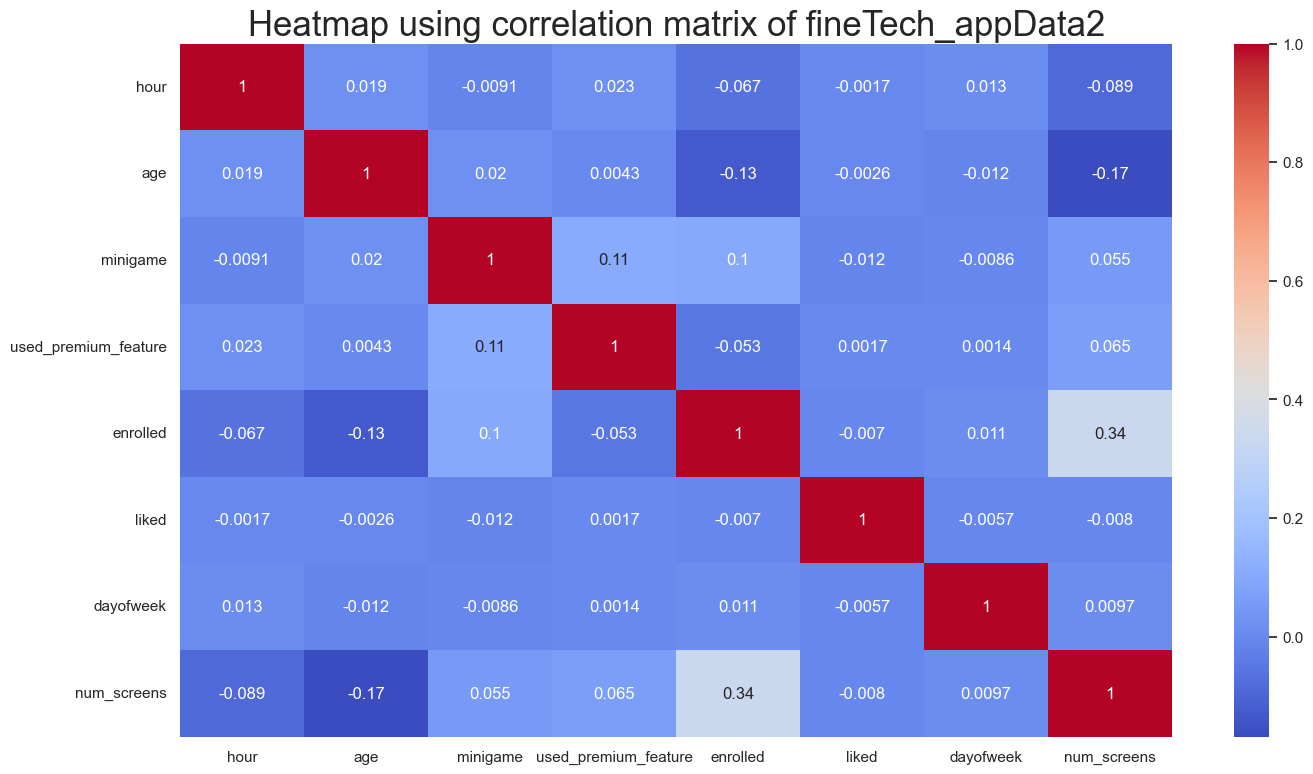

In [82]:
# Heatmap using the correlation matrix

plt.figure(figsize=(16,9))
sns.heatmap(Finetech_data2.corr(), annot = True, cmap ='coolwarm')
plt.title("Heatmap using correlation matrix of fineTech_appData2", fontsize = 25)

There is little correlation between ‘numscreens’ and ‘enrolled’. It means that those customers saw more screen they are taking premium app.

The slightly negative correlation between ‘age’ with ‘enrolled’ and ‘numscreens’. It means that older customers do not use the premium app and they don’t see multiple screens.

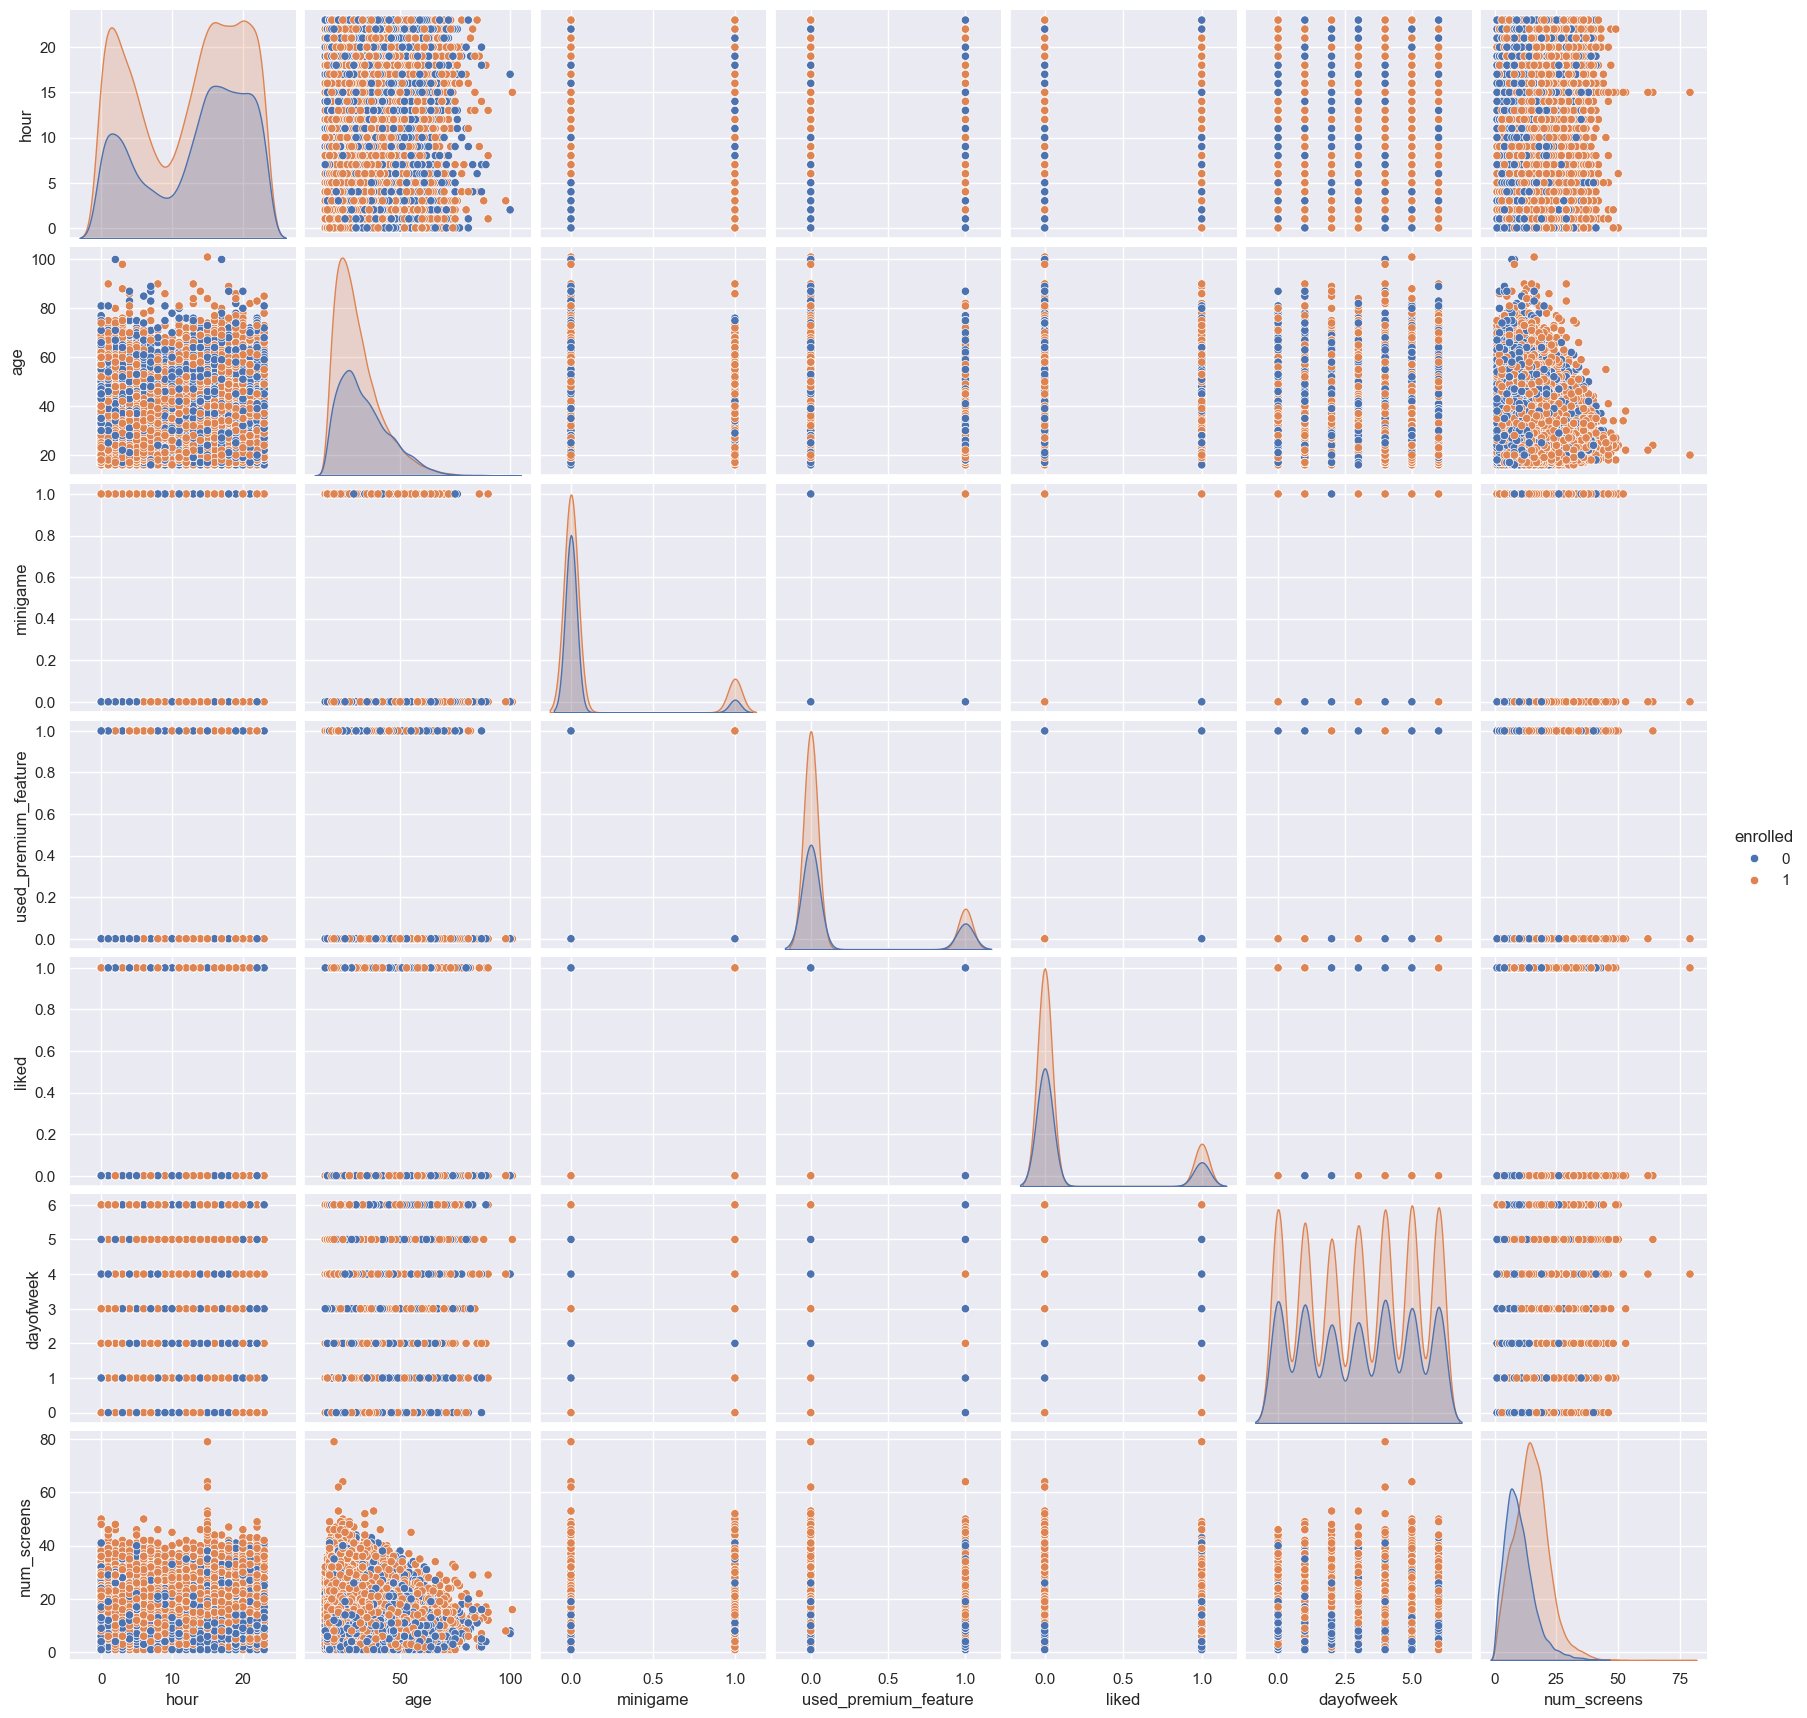

In [83]:
# The pair plot helps to visualize the distribution of data and scatter plot.
sns.pairplot(Finetech_data2, hue  = 'enrolled')

In pair plot we can see, the maximum features have two values like 0 and 1 and orange dots show the enrolled customer’s features. So we visualize the counterplot of enrolled data.


In [84]:
Finetech_data2['enrolled'].value_counts()

enrolled
1    31074
0    18926
Name: count, dtype: int64

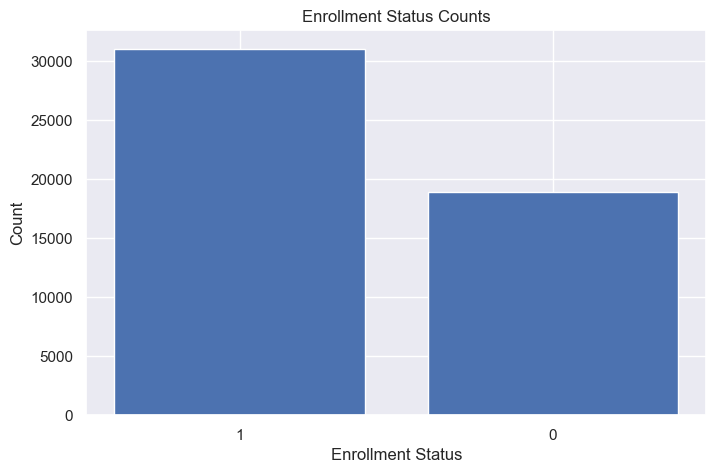

In [85]:
# counter plot
enrollment_counts = Finetech_data2['enrolled'].value_counts()
plt.figure(figsize=(8, 5))
plt.bar(enrollment_counts.index.astype(str), enrollment_counts.values)
plt.title('Enrollment Status Counts')
plt.xlabel('Enrollment Status')
plt.ylabel('Count')

# Displaying the plot
plt.show()

In [86]:
# Here you can see the exact value of enrolled & not enrolled customers.
print("Not enrolled user = ", (Finetech_data.enrolled < 1).sum(), "out of 50000")
print("Enrolled user = ",50000-(Finetech_data.enrolled < 1).sum(),  "out of 50000")

Not enrolled user =  18926 out of 50000
Enrolled user =  31074 out of 50000


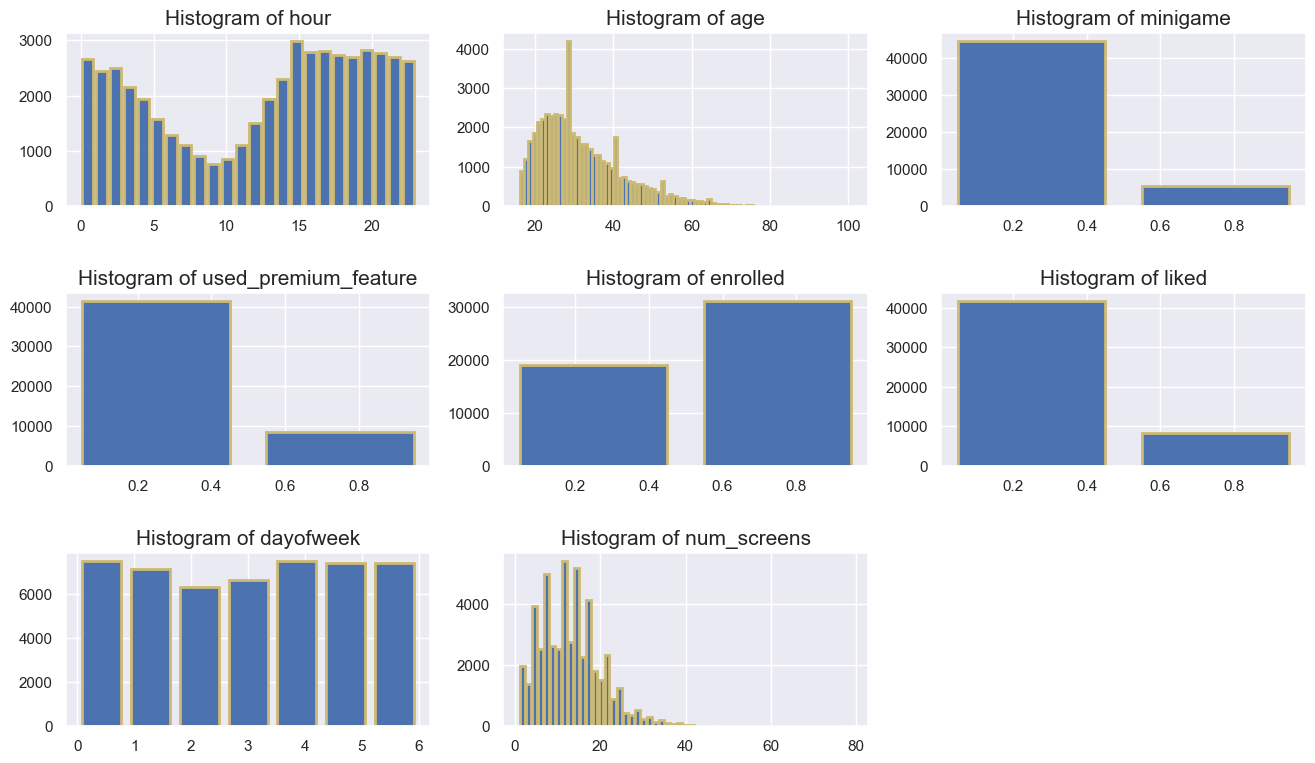

In [87]:
# Histogram of each feature of Finetech_data2

plt.figure(figsize = (16,9))
features = Finetech_data2.columns
for i,j in enumerate(features):
    plt.subplot(3,3,i+1)
    plt.title("Histogram of {}".format(j), fontsize = 15)

    bins = len(Finetech_data2[j].unique())
    plt.hist(Finetech_data2[j], bins = bins, rwidth = 0.8, edgecolor = "y", linewidth = 2, )

plt.subplots_adjust(hspace=0.5)

In the above histogram, we can see **minigame**, **used_primium_feature**, **enrolled**, and like they have only two values and how they distributed.

The histogram of **‘dayofweek’** shows, on Tuesday and Wednesday slightly fewer customer registered the app.

The histogram of **‘hour’** shows the less customer register on the app around 10 AM.

The **‘age’** histogram shows, the maximum customers are younger.

The **‘numsreens’** histogram shows the few customers saw more than 40 screens.

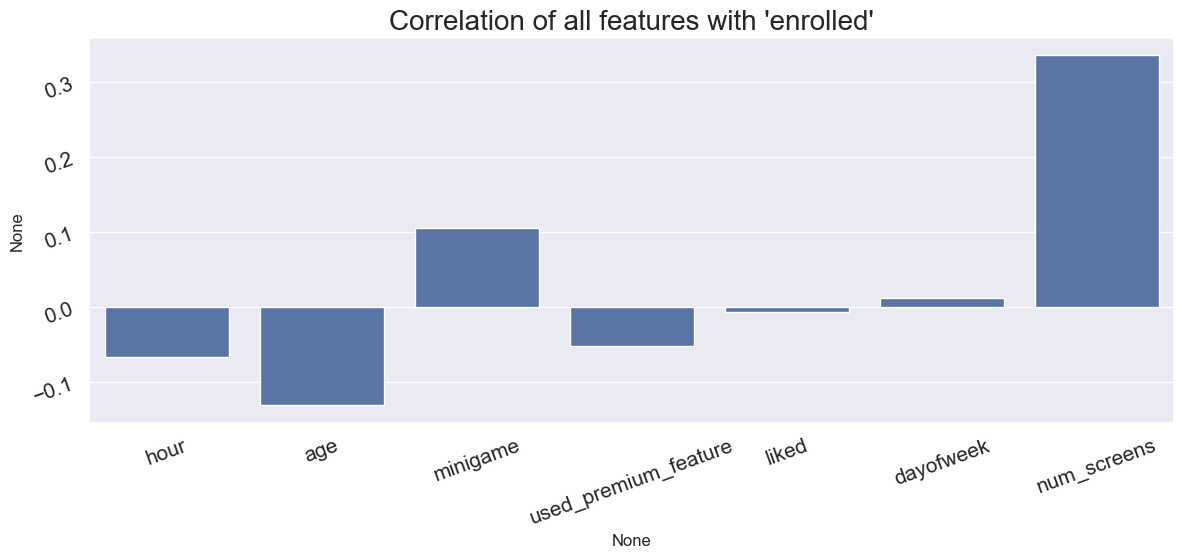

In [88]:
# show corelation barplot 
Finetech_data3 = Finetech_data2.drop(['enrolled'], axis=1)
correlations = Finetech_data3.corrwith(Finetech_data2['enrolled'])
sns.set()
plt.figure(figsize=(14, 5))
plt.title("Correlation of all features with 'enrolled'", fontsize=20)
ax = sns.barplot(x=Finetech_data3.columns, y=correlations)
ax.tick_params(labelsize=15, labelrotation=20, color="k")
plt.show()

The ‘numscreens’ and ‘minigame’ is strongly positively correlated with ‘enrolled’ feature than other feature.

The ‘hour’, ‘age’ and ‘used_premium_feature’ are strongly negatively correlated with the ‘enrolled’ feature.



In [89]:
# parse object data into date time format

Finetech_data['first_open'] =[parser.parse(i) for i in Finetech_data['first_open']]
Finetech_data['enrolled_date'] =[parser.parse(i) if isinstance(i, str) else i for i in Finetech_data['enrolled_date']]
Finetech_data.dtypes

user                             int64
first_open              datetime64[ns]
hour                             int64
age                              int64
screen_list                     object
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dayofweek                        int64
num_screens                      int64
dtype: object

We are finding how much time the customer takes to get enrolled in the premium feature app after registration. For that subtract Finetech_data.first_open’ from Finetech_data.enrolled_date’ and set data type as timedelta64 in hours.

In [90]:
Finetech_data['time_to_enrolled'] = (Finetech_data['enrolled_date'] - Finetech_data['first_open']) / pd.Timedelta(hours=1)


(array([2.8195e+04, 1.0320e+03, 5.6600e+02, 4.2600e+02, 2.8800e+02,
        1.7900e+02, 1.6500e+02, 9.7000e+01, 1.0400e+02, 2.2000e+01]),
 array([   0.       ,  543.4686945, 1086.937389 , 1630.4060835,
        2173.874778 , 2717.3434725, 3260.812167 , 3804.2808615,
        4347.749556 , 4891.2182505, 5434.686945 ]),
 <BarContainer object of 10 artists>)

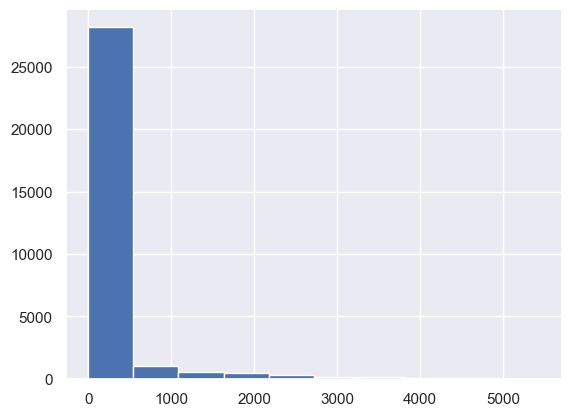

In [91]:
# Plot histogram
plt.hist(Finetech_data['time_to_enrolled'].dropna())

(array([22793.,   755.,   707.,   288.,   347.,   210.,   187.,   212.,
          135.,   178.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

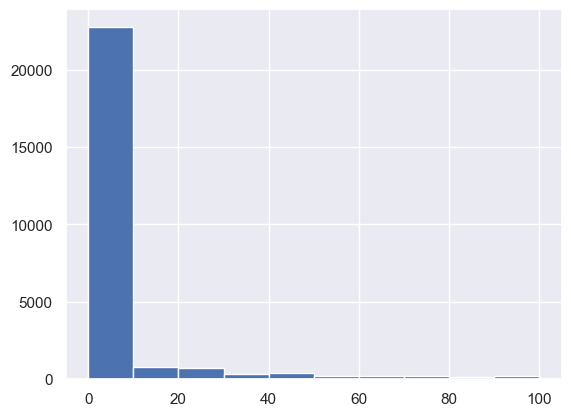

In [92]:
# Plot histogram
plt.hist(Finetech_data['time_to_enrolled'].dropna(), range = (0,100)) 

## Read another file

In [93]:
# read csv file and convert it into numpy array
fineTech_app_screen_Data = pd.read_csv("top_screens.csv").top_screens.values
fineTech_app_screen_Data 

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [94]:
# Add ‘,’ at the end of each string of ‘screen_list’ for further operation.

Finetech_data['screen_list'] = Finetech_data.screen_list.astype(str) + ','


The ‘Screen_list’ contains string values but we can’t use it directly. So to solve this problem we are taking each screen name from ‘fineTech_app_screen_Data’ and append as a column by the same name to ‘fineTech_appData’. Then check this screen name is available in ‘screen_list’ if it is available then add value 1 else 0 in the appended column

In [95]:
# string into to number
 
for screen_name in fineTech_app_screen_Data:
    Finetech_data[screen_name] = Finetech_data.screen_list.str.contains(screen_name).astype(int)
    Finetech_data['screen_list'] = Finetech_data.screen_list.str.replace(screen_name+",", "")

In [96]:
# get shape
Finetech_data.shape

(50000, 71)

In [97]:
# head of DataFrame
Finetech_data.head(6)

,user,first_open,hour,age,screen_list,minigame,used_premium_feature,enrolled,enrolled_date,liked,...,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker
0,235136,2012-12-27 02:14:51.273,2,23,"joinscreen,product_review,ScanPreview,VerifyTo...",0,0,0,NaT,0,...,0,1,0,0,0,0,0,0,0,0
1,333588,2012-12-02 01:16:00.905,1,24,"joinscreen,product_review,product_review2,Scan...",0,0,0,NaT,0,...,0,0,0,0,0,0,0,0,0,0
2,254414,2013-03-19 19:19:09.157,19,23,,0,1,0,NaT,1,...,0,0,0,0,0,0,0,0,0,0
3,234192,2013-07-05 16:08:46.354,16,28,"product_review,Home,product_review,ReferralCon...",0,0,1,2013-07-05 16:11:49.513,0,...,0,0,0,0,0,0,0,0,0,0
4,51549,2013-02-26 18:50:48.661,18,31,"joinscreen,ScanPreview,VerifySSN,Home,SelectIn...",0,0,1,2013-02-26 18:56:37.841,1,...,0,0,0,0,0,0,0,0,0,0
5,56480,2013-04-03 09:58:15.752,9,20,"Home,ScanPreview,VerifySSN,product_review,prod...",0,0,1,2013-04-03 09:59:03.291,0,...,0,0,0,0,0,0,0,0,0,0


Those screens are not availble in ‘fineTech_app_screen_Data’ that are counted and conted number store in new column by name ‘remain_screen_list’.

In [98]:
# remain screen in 'screen_list'
Finetech_data.loc[0,'screen_list']

'joinscreen,product_review,ScanPreview,VerifyToken,ProfileVerifySSN,Settings,ForgotPassword,'

In [99]:
# count remain screen list and store counted number in 'remain_screen_list'
Finetech_data['remain_screen_list'] = Finetech_data.screen_list.str.count(",")

In [100]:
# Drop the 'screen_list'
Finetech_data.drop(columns = ['screen_list'], inplace=True)

In [101]:

# total columns
Finetech_data.columns

Index(['user', 'first_open', 'hour', 'age', 'minigame', 'used_premium_feature',
       'enrolled', 'enrolled_date', 'liked', 'dayofweek', 'num_screens',
       'time_to_enrolled', 'Loan2', 'location', 'Institutions',
       'Credit3Container', 'VerifyPhone', 'BankVerification',
       'VerifyDateOfBirth', 'ProfilePage', 'VerifyCountry', 'Cycle',
       'idscreen', 'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash',
       'Loan', 'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts', 'Saving8',
       'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile', 'VerifyHousing',
       'RewardDetail', 'VerifyHousingAmount', 'ProfileMaritalStatus',
       'ProfileChildren ', 'ProfileEducation', 'Saving7',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'Saving2', 'Saving6', 'Saving2Amount', 'Saving5',
       'ProfileJobTitle', 'Login', 'ProfileEmploymentLeng

In [102]:
# All the saving screens correlated with each other that’s we are taking the sum of all saving screens in each row and store in a single row for all customers.
# take sum of all saving screen in one place
saving_screens = ['Saving1',
                  'Saving2',
                  'Saving2Amount',
                  'Saving4',
                  'Saving5',
                  'Saving6',
                  'Saving7',
                  'Saving8',
                  'Saving9',
                  'Saving10',
                 ]
Finetech_data['saving_screens_count'] = Finetech_data[saving_screens].sum(axis = 1)
Finetech_data.drop(columns = saving_screens, inplace = True)

In [103]:
# similarly for credit, CC1 and loan screens.
credit_screens = ['Credit1',
                  'Credit2',
                  'Credit3',
                  'Credit3Container',
                  'Credit3Dashboard',
                 ]
Finetech_data['credit_screens_count'] = Finetech_data[credit_screens].sum(axis = 1)
Finetech_data.drop(columns = credit_screens, axis = 1, inplace = True)

cc_screens = ['CC1',
              'CC1Category',
              'CC3',
             ]
Finetech_data['cc_screens_count'] = Finetech_data[cc_screens].sum(axis = 1)
Finetech_data.drop(columns = cc_screens, inplace = True)

loan_screens = ['Loan',
                'Loan2',
                'Loan3',
                'Loan4',
               ]
Finetech_data['loan_screens_count'] = Finetech_data[loan_screens].sum(axis = 1)
Finetech_data.drop(columns = loan_screens, inplace = True)

In [104]:
Finetech_data.shape

(50000, 53)

In [105]:
Finetech_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 53 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   user                     50000 non-null  int64         
 1   first_open               50000 non-null  datetime64[ns]
 2   hour                     50000 non-null  int64         
 3   age                      50000 non-null  int64         
 4   minigame                 50000 non-null  int64         
 5   used_premium_feature     50000 non-null  int64         
 6   enrolled                 50000 non-null  int64         
 7   enrolled_date            31074 non-null  datetime64[ns]
 8   liked                    50000 non-null  int64         
 9   dayofweek                50000 non-null  int64         
 10  num_screens              50000 non-null  int64         
 11  time_to_enrolled         31074 non-null  float64       
 12  location                 50000 n

In [106]:
Finetech_data.head(5)

,user,first_open,hour,age,minigame,used_premium_feature,enrolled,enrolled_date,liked,dayofweek,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,remain_screen_list,saving_screens_count,credit_screens_count,cc_screens_count,loan_screens_count
0,235136,2012-12-27 02:14:51.273,2,23,0,0,0,NaT,0,3,...,0,0,0,0,0,7,0,0,0,1
1,333588,2012-12-02 01:16:00.905,1,24,0,0,0,NaT,0,6,...,0,0,0,0,0,5,0,0,0,1
2,254414,2013-03-19 19:19:09.157,19,23,0,1,0,NaT,1,1,...,0,0,0,0,0,0,0,0,0,1
3,234192,2013-07-05 16:08:46.354,16,28,0,0,1,2013-07-05 16:11:49.513,0,4,...,0,0,0,0,0,6,0,3,0,1
4,51549,2013-02-26 18:50:48.661,18,31,0,0,1,2013-02-26 18:56:37.841,1,1,...,0,0,0,0,0,10,0,2,0,1


In [107]:
# Numerical distribution of fineTech_appData
Finetech_data.describe()

,user,first_open,hour,age,minigame,used_premium_feature,enrolled,enrolled_date,liked,dayofweek,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,remain_screen_list,saving_screens_count,credit_screens_count,cc_screens_count,loan_screens_count
count,50000.000000,50000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,31074,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000
mean,186889.729900,2013-03-28 23:47:13.534786560,12.557220,31.72436,0.107820,0.172020,0.621480,2013-04-10 16:23:17.493059072,0.165000,3.029860,...,0.014220,0.013340,0.013400,0.008200,0.007580,6.214260,0.365020,0.92776,0.176860,0.788400
min,13.000000,2012-11-23 00:10:19.912000,0.000000,16.00000,0.000000,0.000000,0.000000,2012-11-23 00:53:10.346000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,93526.750000,2013-02-03 03:17:31.445250048,5.000000,24.00000,0.000000,0.000000,0.000000,2013-02-23 17:08:43.504999936,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.00000,0.000000,0.000000
50%,187193.500000,2013-04-01 02:57:56.743500032,14.000000,29.00000,0.000000,0.000000,1.000000,2013-04-14 13:24:39.666000128,0.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.00000,0.000000,1.000000
75%,279984.250000,2013-05-25 21:08:52.424499968,19.000000,37.00000,0.000000,0.000000,1.000000,2013-05-31 02:36:58.161500160,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,1.00000,0.000000,1.000000
max,373662.000000,2013-07-09 15:52:39.983000,23.000000,101.00000,1.000000,1.000000,1.000000,2013-07-09 15:56:09.465000,1.000000,6.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,10.000000,5.00000,3.000000,3.000000
std,107768.520361,NaN,7.438072,10.80331,0.310156,0.377402,0.485023,NaN,0.371184,2.031997,...,0.118398,0.114727,0.114981,0.090183,0.086733,3.672561,1.405511,1.21751,0.612787,0.677462


<Axes: >

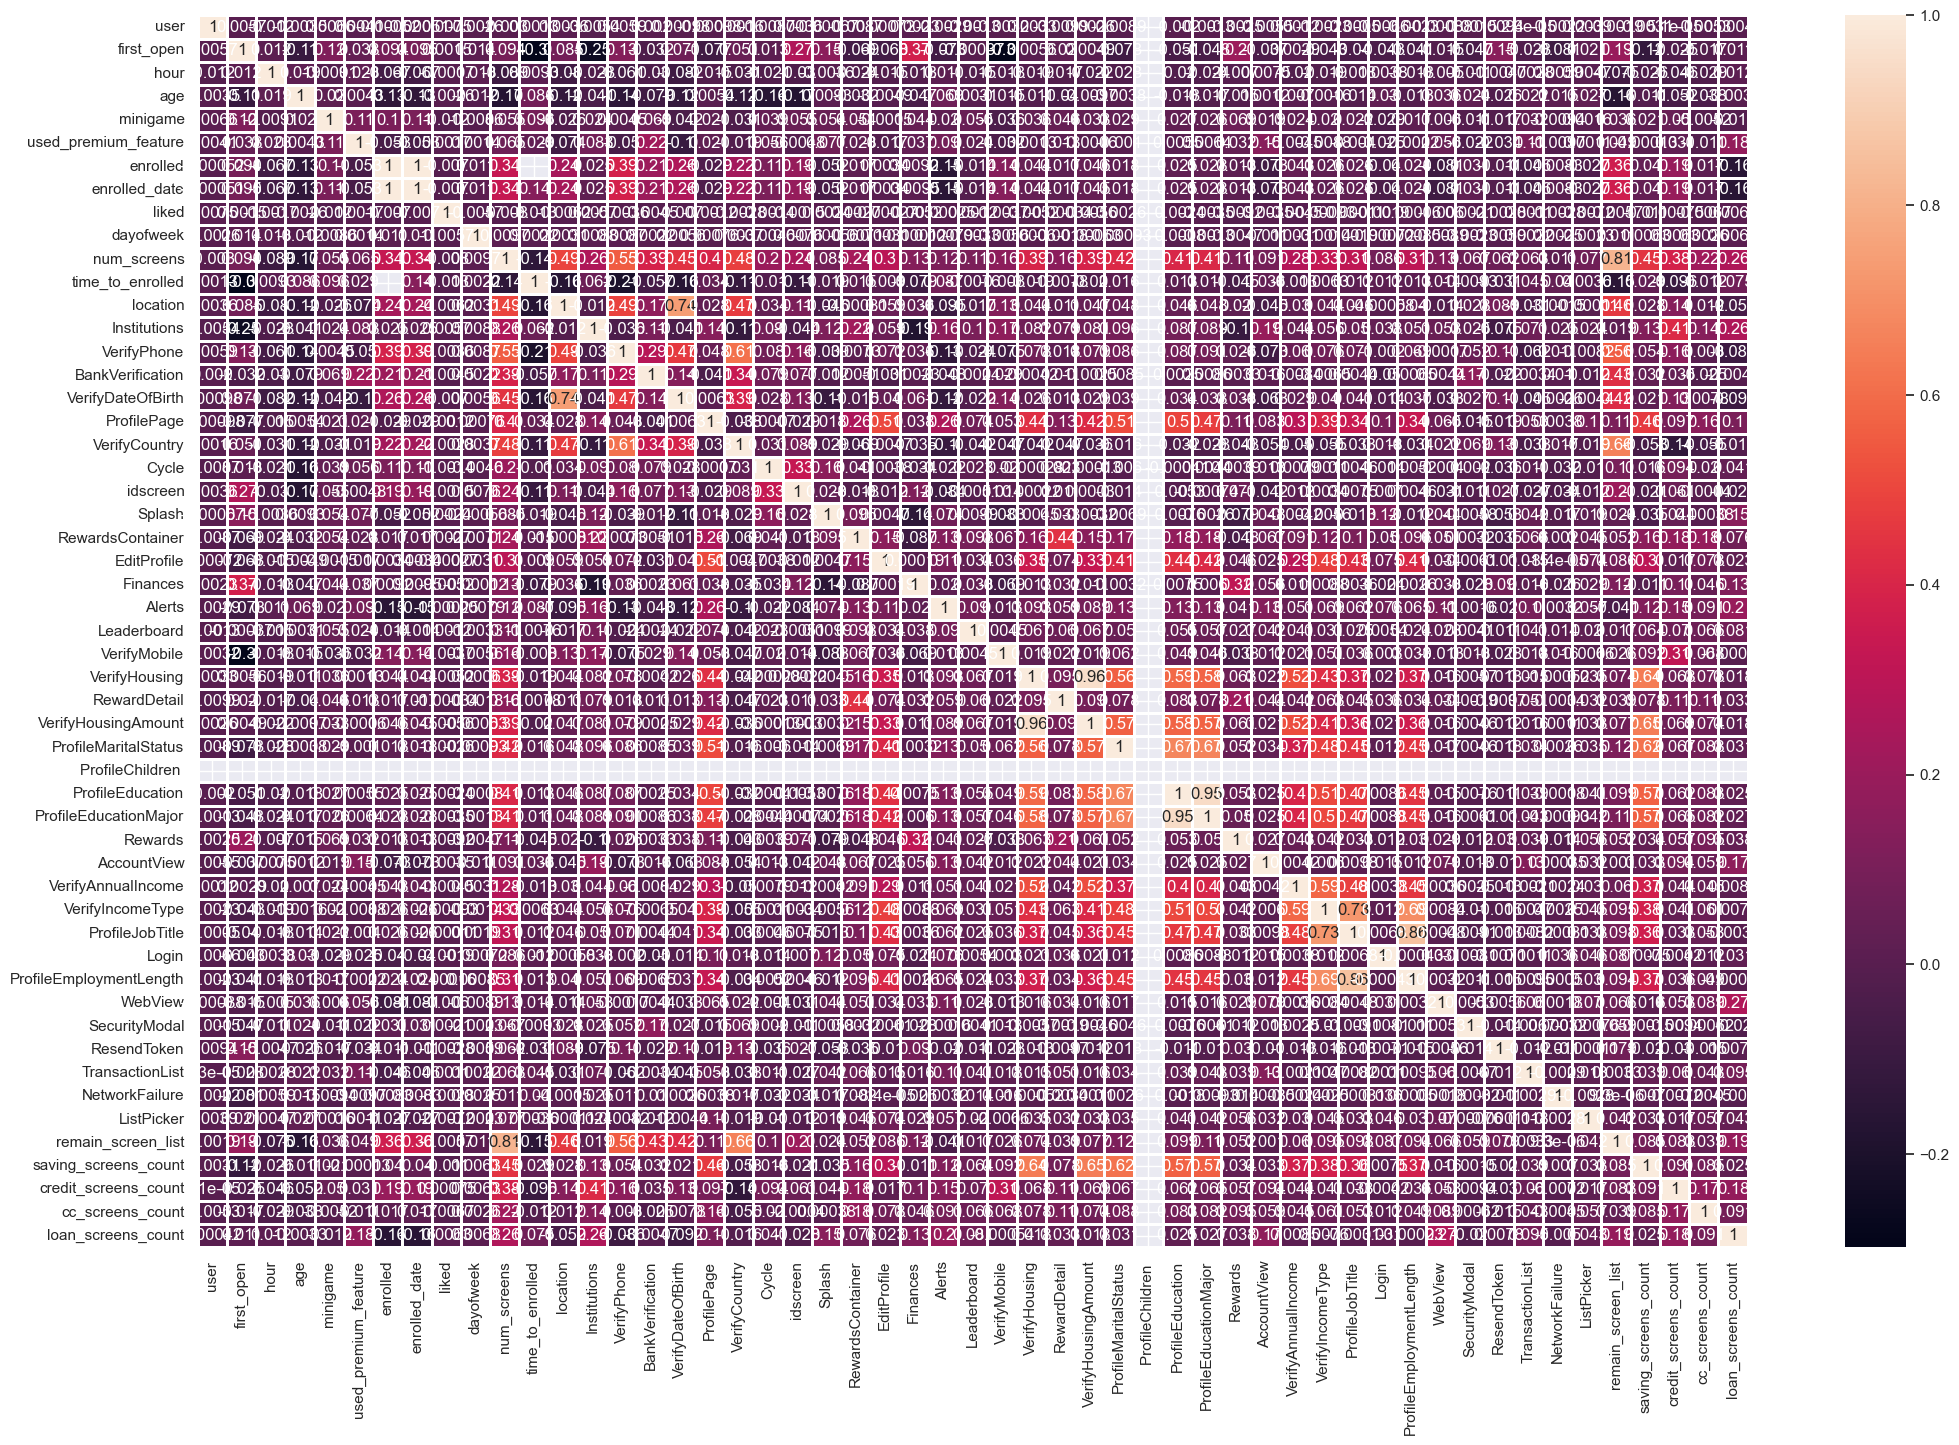

In [108]:
# Heatmap with correlation matrix of new fineTech_appData
 
plt.figure(figsize = (25,16)) 
sns.heatmap(Finetech_data.corr(), annot = True, linewidth =2)

## Split dataset in Train and Test

In [109]:
clean_fineTech_appData = Finetech_data
target = Finetech_data['enrolled']
Finetech_data.drop(columns = ['enrolled','enrolled_date','first_open','time_to_enrolled'], inplace = True)

X_train, X_test, y_train, y_test = train_test_split(Finetech_data, target, test_size = 0.2, random_state = 0)

print('Shape of X_train = ', X_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X_train =  (40000, 49)
Shape of X_test =  (10000, 49)
Shape of y_train =  (40000,)
Shape of y_test =  (10000,)


In [110]:
# take User ID in another variable 
train_userID = X_train['user']
X_train.drop(columns= 'user', inplace =True)
test_userID = X_test['user']
X_test.drop(columns= 'user', inplace =True)

print('Shape of X_train = ', X_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of train_userID = ', train_userID.shape)
print('Shape of test_userID = ', test_userID.shape)

Shape of X_train =  (40000, 48)
Shape of X_test =  (10000, 48)
Shape of train_userID =  (40000,)
Shape of test_userID =  (10000,)


In [111]:
# Feature Scaling
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
# pca = PCA(n_components=4)
# X_train_sc = pca.fit_transform(X_train_scaled)
X_test_sc = sc.transform(X_test)
# X_test_sc = pca.transform(X_test_scaled)

## Machine Learning Model Building

In [112]:
# impoer required packages
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

## Decision Tree Classifier

In [113]:
dt_model = DecisionTreeClassifier(criterion= 'entropy', random_state=0)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
accuracy_score(y_test, y_pred_dt)

0.7083

In [114]:
# train with Standert Scaling dataset
dt_model2 = DecisionTreeClassifier(criterion= 'entropy', random_state=0)
dt_model2.fit(X_train_sc, y_train)
y_pred_dt_sc = dt_model2.predict(X_test_sc)
accuracy_score(y_test, y_pred_dt_sc)

0.7092

## K – Nearest Neighbor Classifier

In [115]:
knn_model = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2,)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
 
accuracy_score(y_test, y_pred_knn)

0.7054

In [116]:
# train with Standert Scaling dataset
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
 
accuracy_score(y_test, y_pred_nb)

0.7011

## Random Forest Classifier

In [117]:
rf_model = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
 
accuracy_score(y_test, y_pred_rf)

0.7604

In [118]:
# train with Standert Scaling dataset
rf_model2 = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
rf_model2.fit(X_train_sc, y_train)
y_pred_rf_sc = rf_model2.predict(X_test_sc)
 
accuracy_score(y_test, y_pred_rf_sc)

0.7594

## Logistic Regression

In [119]:
lr_model = LogisticRegression(random_state = 0, penalty = 'l2')
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
 
accuracy_score(y_test, y_pred_lr)

/opt/anaconda3/envs/maskdino/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7489

In [120]:
# train with Standert Scaling dataset
lr_model2 = LogisticRegression(random_state = 0, penalty = 'l2')
lr_model2.fit(X_train_sc, y_train)
y_pred_lr_sc = lr_model2.predict(X_test_sc)
 
accuracy_score(y_test, y_pred_lr_sc)

0.7487

## Support Vector Classifier

In [121]:
svc_model = SVC()
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)
 
accuracy_score(y_test, y_pred_svc)

0.7454

In [122]:
# train with Standert Scaling dataset
svc_model2 = SVC()
svc_model2.fit(X_train_sc, y_train)
y_pred_svc_sc = svc_model2.predict(X_test_sc)
 
accuracy_score(y_test, y_pred_svc_sc)

0.7727

## XGBoost Classifier

In [123]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
accuracy_score(y_test, y_pred_xgb)

0.7834

In [124]:
# train with Standert Scaling dataset
xgb_model2 = XGBClassifier()
xgb_model2.fit(X_train_sc, y_train)
y_pred_xgb_sc = xgb_model2.predict(X_test_sc)
 
accuracy_score(y_test, y_pred_xgb_sc)

0.7834

### XGBoost With Parameter Tunning

In [137]:
# XGB classifier with parameter tuning
xgb_model_pt1 = XGBClassifier(
 learning_rate =0.01,
 n_estimators=5000,
 max_depth=5,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 reg_alpha=0.005,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
 
xgb_model_pt1.fit(X_train, y_train)
y_pred_xgb_pt1 = xgb_model_pt1.predict(X_test)
 
accuracy_score(y_test, y_pred_xgb_pt1)

0.7884

In [126]:
# train with Stander Scaling dataset
xgb_model_pt2 = XGBClassifier(
 learning_rate =0.01,
 n_estimators=5000,
 max_depth=4,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 reg_alpha=0.005,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
 
xgb_model_pt2.fit(X_train_sc, y_train)
y_pred_xgb_sc_pt2 = xgb_model_pt2.predict(X_test_sc)
 
accuracy_score(y_test, y_pred_xgb_sc_pt2)

0.7883

We observ that Support Vector Classifier and XGBoost Classifier give best accuracy than ohter ML algorithm. But we will continue with XGBoost classifier because the accuracy is slightly higher than SVC.

## Confusion Matrix

Text(0.5, 1.0, 'Confussion Matrix')

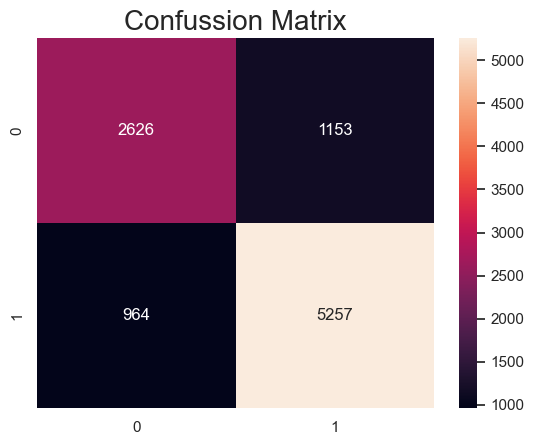

In [127]:
cm_xgb_pt2 = confusion_matrix(y_test, y_pred_xgb_sc_pt2)
sns.heatmap(cm_xgb_pt2, annot = True, fmt = 'g')
plt.title("Confussion Matrix", fontsize = 20) 

## Classification report of ML model

In [128]:
cr_xgb_pt2 = classification_report(y_test, y_pred_xgb_sc_pt2)
 
print("Classification report >>> \n", cr_xgb_pt2)

Classification report >>> 
               precision    recall  f1-score   support

           0       0.73      0.69      0.71      3779
           1       0.82      0.85      0.83      6221

    accuracy                           0.79     10000
   macro avg       0.78      0.77      0.77     10000
weighted avg       0.79      0.79      0.79     10000



## Cross-validation of the ML model

In [132]:
cross_validation = cross_val_score(estimator = xgb_model_pt2, X = X_train_sc, y = y_train, cv = 10)
print("Cross validation of XGBoost model = ",cross_validation)
print("Cross validation of XGBoost model (in mean) = ",cross_validation.mean())

Cross validation of XGBoost model =  [0.7925  0.784   0.79975 0.7935  0.80375 0.79225 0.7865  0.784   0.794
 0.77525]
Cross validation of XGBoost model (in mean) =  0.79055


## Save the Machine Learning model

In [130]:
## Pickle
import pickle
 
# save model
pickle.dump(xgb_model_pt2, open('FineTech_app_ML_model.pickle', 'wb'))
 
# load model
ml_model_pl = pickle.load(open('FineTech_app_ML_model.pickle', 'rb'))
 
# predict the output
y_pred_pl = ml_model_pl.predict(X_test_sc)
 
# confusion matrix
cm_pl = confusion_matrix(y_test, y_pred_pl)
print('Confussion matrix = \n', cm_pl)
 
# show the accuracy
print("Accuracy of model = ",accuracy_score(y_test, y_pred_pl))

Confussion matrix = 
 [[2626 1153]
 [ 964 5257]]
Accuracy of model =  0.7883
